In [2]:
# This script installs the necessary dependencies for the model to run
# It is called by the main script

import subprocess
import sys

#install dependencies
def install_package(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

install_package('joblib')
import joblib

In [ ]:
# Step 1
# import libraries
# The libraries used in this project are imported here
# They are imported depending on the task at hand

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve, roc_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.utils.validation import check_is_fitted
from collections import Counter

In [4]:
# Step 2
# Read and remove index column data
# Path to the CICDDoS2019 dataset

df_main = pd.read_csv(".\Datasets\CIC-DDoS2019 Dataset\cicddos2019_dataset.csv", usecols=lambda column: column not in ['Unnamed: 0'])

# Drop the "Label" column which is type of attack
df_main.drop(['Label'], axis=1, inplace=True)

# Improve processing
df = df_main.sample(n=100000, random_state=0)

# Display the first few rows of the dataframe
df.head()

<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
C:\Users\telag\AppData\Local\Temp\ipykernel_29008\906737791.py:5: SyntaxWarning: invalid escape sequence '\D'
  df_main = pd.read_csv(".\Datasets\CIC-DDoS2019 Dataset\cicddos2019_dataset.csv", usecols=lambda column: column not in ['Unnamed: 0'])


,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
15124,6,100544,1,1,6,6,6,6,6.00,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
414355,17,884,50,0,21568,0,440,224,431.36,42.756912,...,-1,0.0,0.0,0,0,0.0,0.0,0,0,0
232748,17,20893,2,2,64,256,32,32,32.00,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
349710,17,104,6,0,2640,0,440,440,440.00,0.000000,...,-1,0.0,0.0,0,0,0.0,0.0,0,0,0
201509,17,3001061,4,0,2064,0,516,516,516.00,0.000000,...,14,0.0,0.0,0,0,0.0,0.0,0,0,0


In [5]:
df.isnull().sum()

Protocol                    0
Flow Duration               0
Total Fwd Packets           0
Total Backward Packets      0
Fwd Packets Length Total    0
                           ..
Idle Mean                   0
Idle Std                    0
Idle Max                    0
Idle Min                    0
Class                       0
Length: 78, dtype: int64

In [6]:
df.duplicated().sum()

np.int64(909)

In [7]:
# Step 3
# Dropping duplicates and null values
# Remove duplicates and null values from the dataset

df.drop_duplicates(inplace=True)
print("Number of Duplicate dropped" , df.duplicated().sum())

Number of Duplicate dropped 0


In [8]:
print(sorted(Counter(df['Protocol']).items()))

[(0, 389), (6, 26861), (17, 71841)]


In [9]:
# Step 4
# Encoding the Protocol column
X1=df
Y=df['Protocol']
X= X1.drop(['Protocol'], axis=1)
#balancing using oversampling
ros=RandomOverSampler(random_state=0)
x_resampled,y_resampled=ros.fit_resample(X,Y)
print(sorted(Counter(y_resampled).items()), y_resampled.shape)

#using SMOTE to balance
#assuming "categorical_feature1" and "catergorical_feature2" are features
#label_enc_1 = LabelEncode()
#label_enc_2 = LabelEncode()
#X['Label'] = label_enc_1.fit_transform(X['Label'])
#X['Class'] = lable_enc_2.fit_transform(X['Class'])

##specify which coloum is catergorical after encoding
#catergorical_features_indices = [X.columns.tolist().index('Class'), x.columns.tolist.index('Class')]

#smote_nc = SMOTENC(catergorical_feature=catergorical_features_indices, random_state=42)
#X2_resampled, y2_resampled = smote_nc.fit_resample(X, Y)

#print("The results of SMOTE method:")
#print(sorted(Counter(y-resampled).items()), y_resampled.shape)

[(0, 71841), (6, 71841), (17, 71841)] (215523,)


In [10]:
# Step 5
# Save the balanced data
# Save the balanced data to a csv file


## NO resampling for fast analysis
#X_resampled = X
#y_resampled = Y
##rearranging data from oversampling
bf=x_resampled
bf.insert(0,"Protocol", y_resampled)
##rearrange data from SMOTE
#bf=X2_resampled
#bd.insert(0, "Protocol", y2_resampled)

#new balanced data
bf.head()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,6,100544,1,1,6,6,6,6,6.00,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
1,17,884,50,0,21568,0,440,224,431.36,42.756912,...,-1,0.0,0.0,0,0,0.0,0.0,0,0,0
2,17,20893,2,2,64,256,32,32,32.00,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
3,17,104,6,0,2640,0,440,440,440.00,0.000000,...,-1,0.0,0.0,0,0,0.0,0.0,0,0,0
4,17,3001061,4,0,2064,0,516,516,516.00,0.000000,...,14,0.0,0.0,0,0,0.0,0.0,0,0,0


In [11]:
#create separate label encoder
label_encode_class = LabelEncoder()

#Apply label encodes to columns
bf["Class"] = label_encode_class.fit_transform(bf["Class"])

#Display first few rows
bf.head()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,6,100544,1,1,6,6,6,6,6.00,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
1,17,884,50,0,21568,0,440,224,431.36,42.756912,...,-1,0.0,0.0,0,0,0.0,0.0,0,0,0
2,17,20893,2,2,64,256,32,32,32.00,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
3,17,104,6,0,2640,0,440,440,440.00,0.000000,...,-1,0.0,0.0,0,0,0.0,0.0,0,0,0
4,17,3001061,4,0,2064,0,516,516,516.00,0.000000,...,14,0.0,0.0,0,0,0.0,0.0,0,0,0


In [12]:
# Step 6
# MinMaxScaler
# MinMaxScaler is used to scale the data 

scaler=MinMaxScaler()
d=scaler.fit_transform(bf)
d=pd.DataFrame(d,columns=list(bf.columns))

In [14]:
# Step 7
# We are targetting the "Class" column for prediction and the rest are the features
# The features are stored in the variable "X" and the target in the variable "Y"

target_name='Class'
y=d[target_name]
x=d.drop([target_name], axis=1)
x.shape

(215523, 77)

In [15]:
# Step 8
#Remove correlated features using Pearson Correlation to avoid multicollinearity
#The function below will remove the correlated features
#The threshold is set to 0.8
#The function will return the correlated features
#The function will remove the correlated features from the training and testing data
#The function will return the training and testing data without the correlated features

def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

#split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

#identify the correlated features and drop them
ncorr_features = correlation(X_train, 0.8)

#drop features from the training and testing data
x_train = X_train.drop(ncorr_features, axis=1)
x_test = X_test.drop(ncorr_features, axis=1)

In [16]:
# Step 9
# Feature selection using tree classifier for importance of features
# ExtraTreesClassifier

etc = ExtraTreesClassifier(n_estimators=100)
etc.fit(x_train, y_train)
importances = etc.feature_importances_
print(x_train.shape[1])

45


In [17]:
# Step 10
# Selecting the top 15 features for training and testing data

#n_features = x_train.shape[1]
n_features = 15
indices = np.argsort(importances)[::-1][:n_features]
print(x_train.columns[indices])
X_train_selected = x_train.iloc[:, indices]
X_test_selected = x_test.iloc[:, indices]

Index(['Protocol', 'Flow Duration', 'ACK Flag Count', 'Fwd Packet Length Min',
       'URG Flag Count', 'Down/Up Ratio', 'Fwd Packet Length Max',
       'Bwd Packet Length Min', 'Init Fwd Win Bytes',
       'Fwd Packets Length Total', 'Bwd Packet Length Max',
       'Fwd Packet Length Std', 'CWE Flag Count', 'Flow IAT Mean',
       'Bwd IAT Total'],
      dtype='object')


In [18]:
# Step 11
# print top 15 important features for training and testing

top_15_indices = np.argsort(importances)[:: -1][:15]
top_15_features = x_train.columns[top_15_indices]
print("Top 15 important Features:")
print(top_15_features)

Top 15 important Features:
Index(['Protocol', 'Flow Duration', 'ACK Flag Count', 'Fwd Packet Length Min',
       'URG Flag Count', 'Down/Up Ratio', 'Fwd Packet Length Max',
       'Bwd Packet Length Min', 'Init Fwd Win Bytes',
       'Fwd Packets Length Total', 'Bwd Packet Length Max',
       'Fwd Packet Length Std', 'CWE Flag Count', 'Flow IAT Mean',
       'Bwd IAT Total'],
      dtype='object')


In [19]:
# Step 12
# Train and evaluate models using the selected features

from sklearn.neighbors import KNeighborsClassifier

# Train and evaluate models using the selected features

# Logistic Regression
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_selected, y_train)
y_pred_logreg = logreg_model.predict(X_test_selected)

# Support Vector Machine (SVM) Classifier
svm = SVC(kernel='linear', gamma='auto', C=2, probability=True)
svm.fit(X_train_selected, y_train)
y_pred_svm = svm.predict(X_test_selected)

# KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_selected, y_train)
y_knn_predict = knn_model.predict(X_test_selected)

# XGBoost - Powerful gradient boosting implementation
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                         learning_rate=0.1, n_estimators=100, max_depth=6,
                         min_child_weight=1, gamma=0, subsample=0.8,
                         colsample_bytree=0.8)
xgb_model.fit(X_train_selected, y_train)


C:\Users\telag\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xgboost\core.py:158: UserWarning: [03:05:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

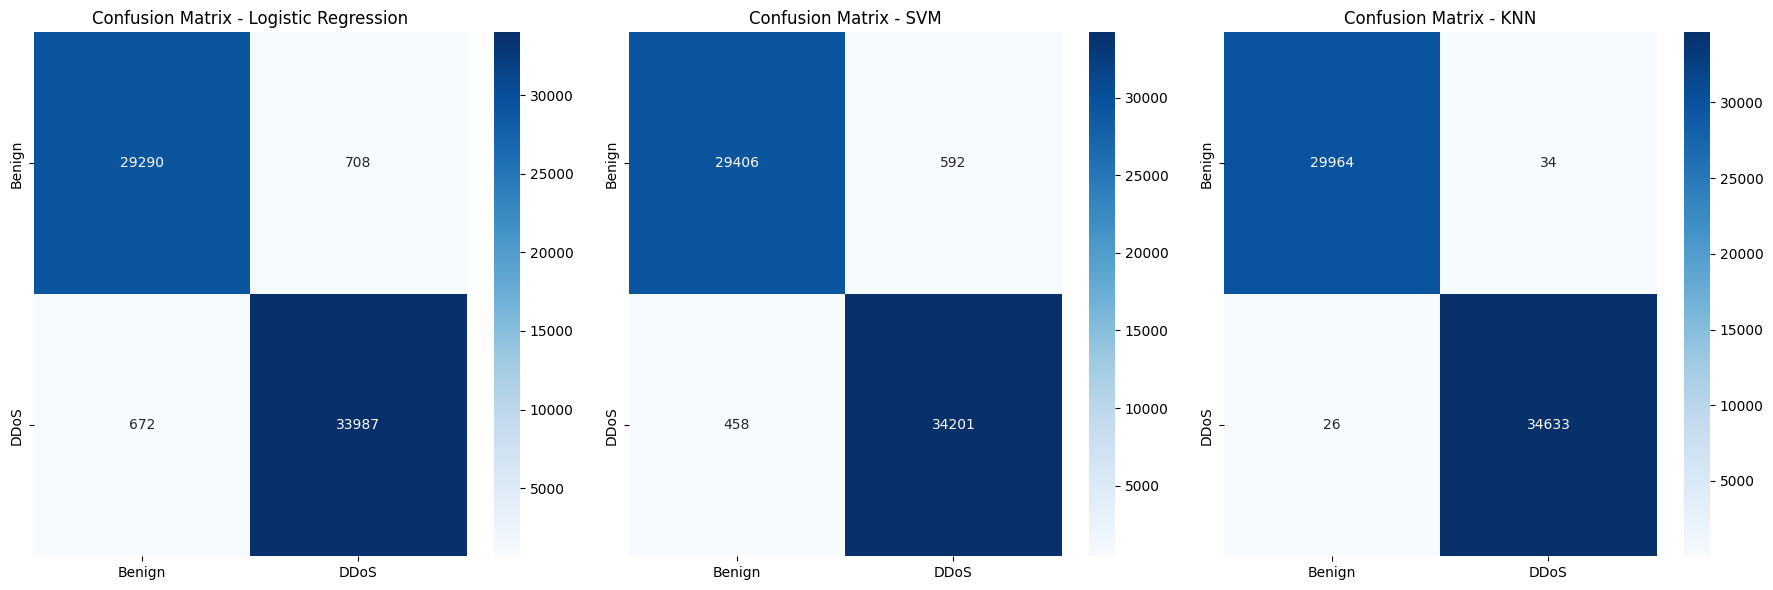

In [20]:
# Step 13
# Confusion Matrices
# This shows the performance of the models using confusion matrices in terms of True Positives, True Negatives, False Positives, and False Negatives

plt.figure(figsize=(18, 6))

# Confusion Matrix for Logistic Regression
plt.subplot(1, 3, 1)
cm1 = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Benign', 'DDoS'],
            yticklabels=['Benign', 'DDoS'])
plt.title('Confusion Matrix - Logistic Regression')

# Confusion Matrix for SVM
plt.subplot(1, 3, 2)
cm2 = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'DDoS'],
            yticklabels=['Benign', 'DDoS'])
plt.title('Confusion Matrix - SVM')

# Confusion Matrix for KNN
plt.subplot(1, 3, 3)
cm3 = confusion_matrix(y_test, y_knn_predict)
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'DDoS'],
            yticklabels=['Benign', 'DDoS'])
plt.title('Confusion Matrix - KNN')
plt.tight_layout()
plt.show()


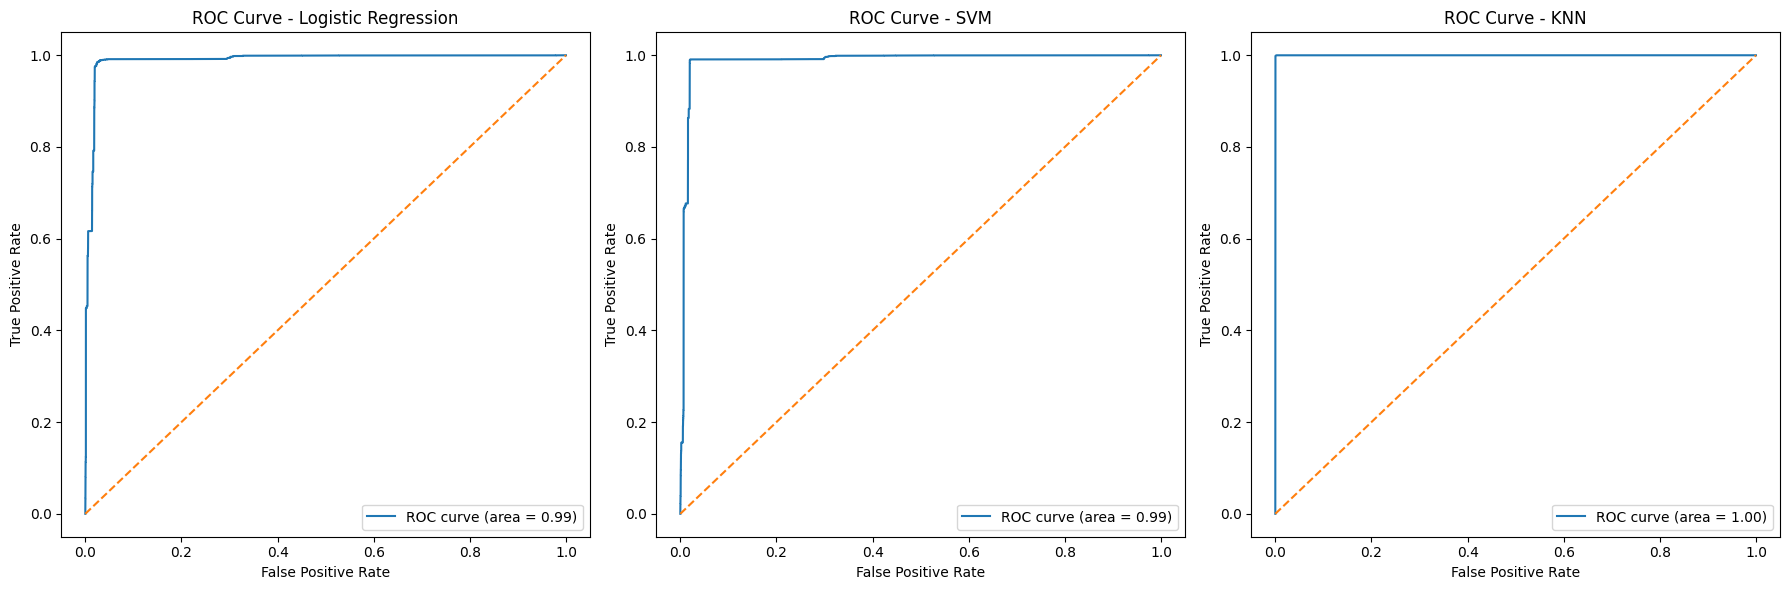

In [21]:
# Receiver Operating Characteristic Curve
# Step 14
# This shows the performance of the models using the ROC curve
# The ROC curve is a graphical representation of the true positive rate against the false positive rate
# It shows the tradeoff between sensitivity and specificity

plt.figure(figsize=(18, 6))

# ROC Curve for Logistic Regression
plt.subplot(1, 3, 1)
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg_model.decision_function(X_test_selected))
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)
plt.plot(fpr_logreg, tpr_logreg, label=f'ROC curve (area = {roc_auc_logreg:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()

# ROC Curve for SVM
plt.subplot(1, 3, 2)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm.decision_function(X_test_selected))
roc_auc_svm = auc(fpr_svm, tpr_svm)
plt.plot(fpr_svm, tpr_svm, label=f'ROC curve (area = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend()

# ROC Curve for KNN
plt.subplot(1, 3, 3)
y_scores_knn = knn_model.predict_proba(X_test_selected)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_scores_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
plt.plot(fpr_knn, tpr_knn, label=f'ROC curve (area = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend()

plt.tight_layout()
plt.show()

C:\Users\telag\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xgboost\core.py:158: UserWarning: [03:19:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


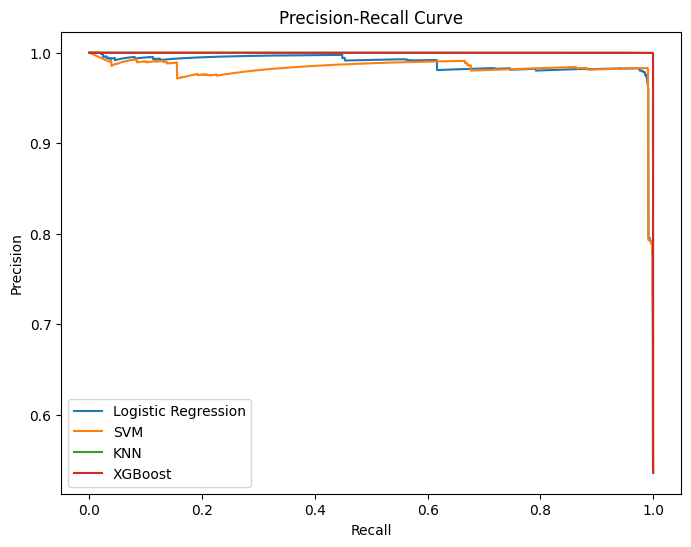

In [22]:
# Step 15
# Precision-Recall Curve
# A precision-recall curve is a plot of the precision (y-axis) and the recall (x-axis) for different thresholds,
# much like the ROC curve. The precision-recall curve is particularly useful when the classes are imbalanced.
# It shows the trade-off between precision and recall for different thresholds.

# Define the models dictionary
models = {
    'Logistic Regression': logreg_model,
    'SVM': svm,
    'KNN': knn_model,
    'XGBoost': xgb_model
}

plt.figure(figsize=(8, 6))

for name, model in models.items():
    model.fit(X_train_selected, y_train)
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test_selected)[:,1]
    else:
        y_scores = model.decision_function(X_test_selected)
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    plt.plot(recall, precision, label=f'{name}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [23]:
# Step 16
# Learning Curves
# Learning curves are a great way to see how the performance of a model changes as the amount of training data increases.
# They are useful for diagnosing issues like overfitting and underfitting.

import joblib

# Calculate accuracy for Logistic Regression model
y_pred_logreg = logreg_model.predict(X_test_selected)
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
print(f'Logistic Regression Model Accuracy: {logreg_accuracy:.2f}')

# Calculate accuracy for SVM model
y_pred_svm = svm.predict(X_test_selected)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f'SVM Model Accuracy: {svm_accuracy:.2f}')

# Calculate accuracy for KNN model
y_knn_predict = knn_model.predict(X_test_selected)
knn_accuracy = accuracy_score(y_test, y_knn_predict)
print(f'KNN Model Accuracy: {knn_accuracy:.2f}')

# Save KNN model
joblib.dump(knn_model, 'knn_model.joblib')

# Save Logistic Regression model
joblib.dump(logreg_model, 'logreg_model.joblib')

# Save SVM model
joblib.dump(svm, 'svm_model.joblib')

Logistic Regression Model Accuracy: 0.98
SVM Model Accuracy: 0.98
KNN Model Accuracy: 1.00


['svm_model.joblib']

<Figure size 1600x1000 with 0 Axes>

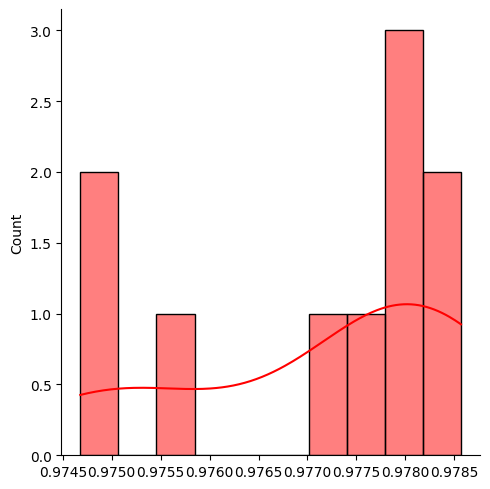

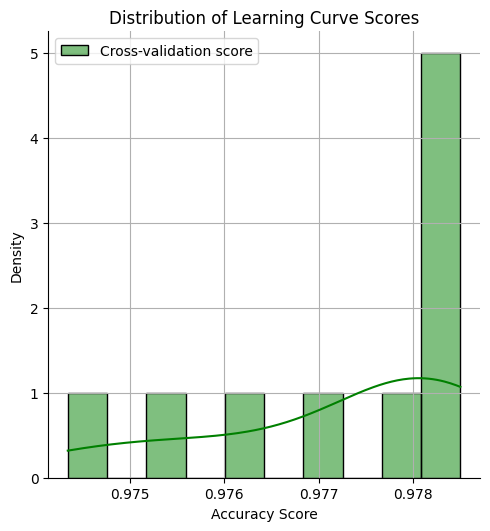

In [24]:
# Step 17
# Learning Curves
# Learning curves are a great way to see how the performance of a model changes as the amount of training data increases.
# They are useful for diagnosing issues like overfitting and underfitting.

from sklearn.model_selection import learning_curve

# Define the model
model = LogisticRegression(max_iter=1000)

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(model, X_train_selected, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot distribution curve
plt.figure(figsize=(16, 10))
sns.displot(train_scores_mean, bins=10, kde=True, label='Training score', color='r')
sns.displot(test_scores_mean, bins=10, kde=True, label='Cross-validation score', color='g')

plt.title('Distribution of Learning Curve Scores')
plt.xlabel('Accuracy Score')
plt.ylabel('Density')
plt.legend(loc='best')
plt.grid()
plt.show()
